# FASHION MINST DATAASET 

### Creating a convolution neural network on the fashion dataset

Importing the libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [5]:
y_train[1]

0

Visualizing

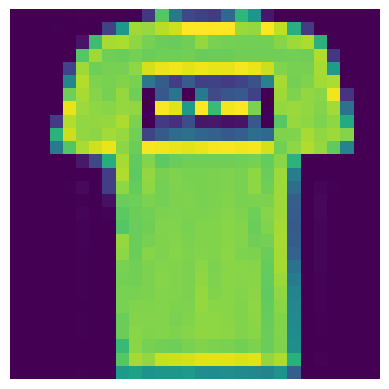

In [6]:
plt.imshow(x_train[1])
plt.axis('off');

## Normalizing the data of the images

In [9]:
print("The max value is: ",x_train.max())
print("The min value is: ",x_train.min())

The max value is:  255
The min value is:  0


In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

## Building the Neural Network

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN LAYER
model.add(Flatten())

# DENSE LAYER
model.add(Dense(128, activation='relu'))

# FINAL LAYER
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model Summary

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

Training

In [19]:
model.fit(x_train,y_cat_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4057 - accuracy: 0.8553
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2778 - accuracy: 0.9005
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2398 - accuracy: 0.9140
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2142 - accuracy: 0.9231
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1981 - accuracy: 0.9290
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1816 - accuracy: 0.9355
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1687 - accuracy: 0.9406
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1593 - accuracy: 0.9438
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1515 - accuracy: 0.9464
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.142

Visualizations 

In [23]:
model.history.history

{'loss': [0.4056839942932129,
  0.27782580256462097,
  0.23978164792060852,
  0.21420854330062866,
  0.1981011927127838,
  0.18156534433364868,
  0.16868625581264496,
  0.1592821180820465,
  0.15146124362945557,
  0.14277340471744537,
  0.1340448558330536,
  0.1297767162322998,
  0.1237083300948143,
  0.11973484605550766,
  0.11673042178153992,
  0.11234059184789658,
  0.10773919522762299,
  0.1076231524348259,
  0.10189075767993927,
  0.09921270608901978],
 'accuracy': [0.8552666902542114,
  0.9004666805267334,
  0.9139666557312012,
  0.9230833053588867,
  0.9289500117301941,
  0.9354833364486694,
  0.9406166672706604,
  0.9437833428382874,
  0.9464166760444641,
  0.9497500061988831,
  0.9532166719436646,
  0.9549499750137329,
  0.9575999975204468,
  0.958816647529602,
  0.9607833623886108,
  0.9611499905586243,
  0.9638333320617676,
  0.963699996471405,
  0.9654333591461182,
  0.9671333432197571]}

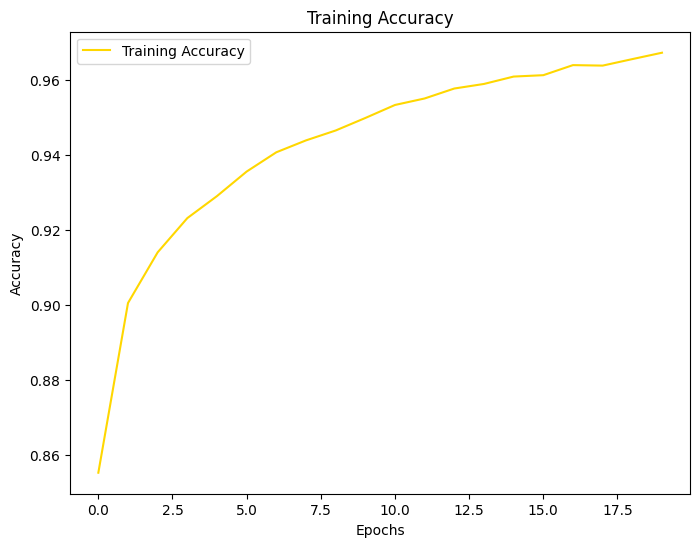

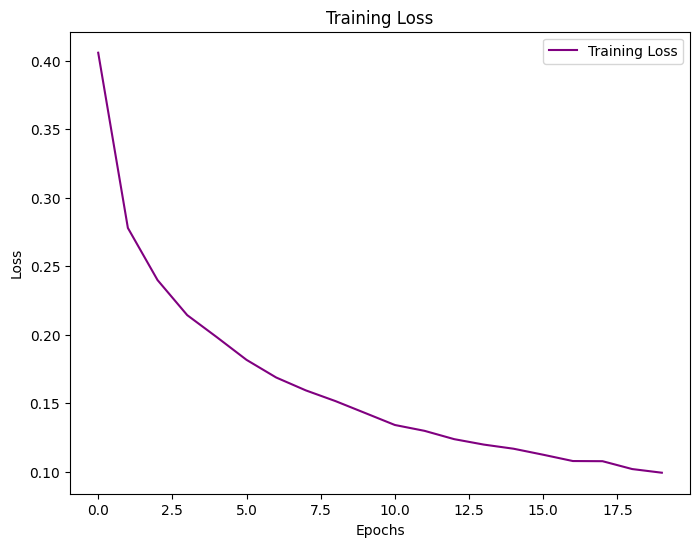

In [27]:
# Accessing training history
history = model.history.history

# Plotting accuracy
plt.figure(figsize=(8, 6))
plt.plot(history['accuracy'], label='Training Accuracy', color='gold')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.figure(figsize=(8, 6))
plt.plot(history['loss'], label='Training Loss', color='purple')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


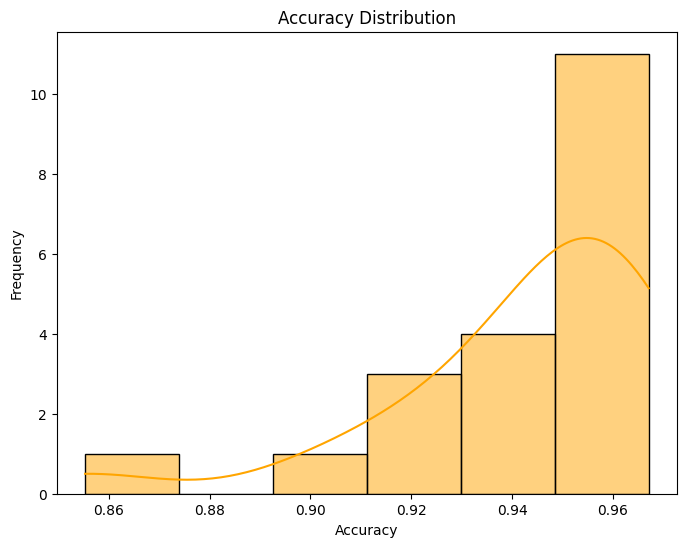

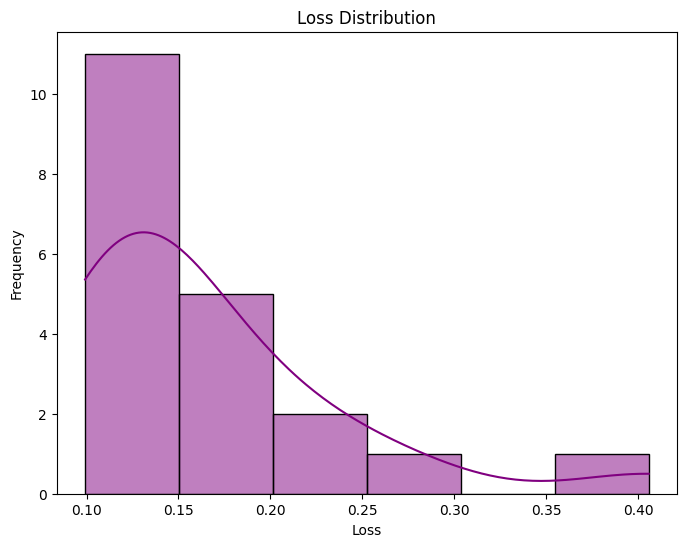

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accessing training history
history = model.history.history

# Creating a histogram for accuracy distribution
plt.figure(figsize=(8, 6))
sns.histplot(history['accuracy'], kde=True, color='orange')
plt.title('Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

# Creating a histogram for loss distribution
plt.figure(figsize=(8, 6))
sns.histplot(history['loss'], kde=True, color='purple')
plt.title('Loss Distribution')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()


Evaluration

In [31]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 0s 963us/step - loss: 0.4895 - accuracy: 0.8972


[0.48951631784439087, 0.8971999883651733]